In [1]:
%matplotlib inline
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn import decomposition, preprocessing
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (12.0, 10.0)


/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv('all-mpi.csv')

In [3]:
df.columns

Index(['benchmark', 'machine', 'repetition', 'test', 'result'], dtype='object')

In [4]:
df.benchmark.unique()

array(['stressng', 'comd', 'lulesh', 'miniaero', 'miniamr', 'minife'], dtype=object)

In [5]:
df.test.unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', nan, 'numa', 'oom-pipe', 'opcode',
       'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'stack',
       'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm', 'vm-rw',
       'vm-splice', 'zero', 'comd', 'lulesh', 'miniaero', 'miniamr',
       'minife'], dtype=object)

In [6]:
df

,benchmark,machine,repetition,test,result
0,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,af-alg,7.588475e+03
1,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,atomic,6.893127e+05
2,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,bigheap,3.682802e+04
3,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,brk,6.934742e+05
4,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,bsearch,3.646931e+02
5,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,cache,3.499995e+00
6,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,cpu,2.706189e+02
7,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,crypt,1.566044e+02
8,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,full,2.883680e+05
9,stressng,c220g1.quiho.schedock-PG0.wisc.cloudlab.us,1,heapsort,4.599980e+00


In [7]:
df['machine+repetition'] = df.apply(lambda x: x['machine'] + '-' + str(x['repetition']), axis=1) 

In [8]:
len(df.index)

3108

In [9]:
df.dropna(inplace=True)

In [10]:
len(df.index)

3042

In [11]:
# pivot table to obtain features, where each microbenchmark is a feature
features = df.pivot_table(index=["machine+repetition","test"], values=['result'], fill_value=0, aggfunc=np.mean).unstack().reset_index()

In [12]:
# flatten the index
cols = features.columns.get_level_values(1).values
cols[0] = 'machine+repetition'
features.columns = cols
features.dropna(inplace=True)

In [13]:
# get features that we'll use
feature_columns = list(pd.Index(df.query('benchmark == "stressng"')['test'].unique()))

In [14]:
feature_columns

['af-alg',
 'atomic',
 'bigheap',
 'brk',
 'bsearch',
 'cache',
 'cpu',
 'crypt',
 'full',
 'heapsort',
 'hsearch',
 'icache',
 'lockbus',
 'longjmp',
 'lsearch',
 'malloc',
 'matrix',
 'memcpy',
 'mincore',
 'mmap',
 'mremap',
 'msync',
 'nop',
 'numa',
 'oom-pipe',
 'opcode',
 'qsort',
 'remap',
 'resources',
 'rmap',
 'shm',
 'shm-sysv',
 'stack',
 'stackmmap',
 'str',
 'stream',
 'tsearch',
 'vecmath',
 'vm',
 'vm-rw',
 'vm-splice',
 'zero']

In [15]:
len(feature_columns)

42

In [16]:
# what we can learn
features.columns.difference(feature_columns + ['machine+repetition'])

Index(['comd', 'lulesh', 'miniaero', 'miniamr', 'minife'], dtype='object')

In [17]:
features[feature_columns]

,af-alg,atomic,bigheap,brk,bsearch,cache,cpu,crypt,full,heapsort,...,stack,stackmmap,str,stream,tsearch,vecmath,vm,vm-rw,vm-splice,zero
0,7588.475463,689312.741493,36828.022475,693474.242737,364.693070,3.499995,270.618852,156.604364,288368.038741,4.599980,...,0.0,5.599331,20183.100000,14.521621,16.567655,963.337091,34699.655986,115.192766,592730.117695,728364.318646
1,7366.269348,680114.967270,37548.652983,687303.034212,371.529748,3.599986,265.886764,157.627840,284703.477701,4.599989,...,0.0,5.696819,20084.554827,14.633913,16.842473,973.468064,34699.133321,114.310861,585163.050239,735669.421836
2,7426.831793,672113.392715,37672.681781,696028.705145,372.073582,3.599990,263.365233,154.585965,291349.993189,4.299988,...,0.0,5.597284,20539.730851,14.153331,16.757978,1003.082853,34702.575930,113.390973,604777.216796,722272.222909
3,7444.144442,684062.382461,36550.605805,686128.867532,369.523105,3.699973,258.212404,155.837246,284046.500440,4.700000,...,0.0,5.697299,21136.313888,14.690459,16.843626,960.408569,34702.388464,116.918648,593841.888630,735044.888436
4,7364.890956,679706.078240,37095.223002,679317.184300,372.053084,3.599972,271.092108,154.911883,307666.614068,4.700010,...,0.0,5.697773,20200.784766,14.570623,16.769731,932.788347,34700.646862,118.244637,583996.739159,735076.480356
5,7402.560532,683096.296676,36264.586068,682043.833490,369.380757,3.799997,270.178956,164.296271,270500.815572,4.700006,...,0.0,5.699512,21002.061735,14.419295,16.357675,971.768421,34702.784044,109.098832,595768.326070,702739.684433
6,11121.205979,563538.492911,16380.919049,215681.364077,309.866387,4.099996,201.199616,105.970531,194819.362028,3.699990,...,0.0,93.814862,13136.469843,10.239278,14.968815,867.615313,31417.343857,149.285834,502914.059232,579610.287418
7,11061.603571,566528.693600,9413.805180,237762.105605,308.477014,4.399998,154.967638,105.268050,150188.726374,3.699877,...,0.0,170.271414,14956.252418,10.553452,14.633961,867.246840,31403.439406,135.514097,492700.328004,580711.352238
8,10979.652394,562796.101556,9038.642882,457138.029344,306.805807,4.399993,135.000934,105.165063,193419.199491,3.699915,...,0.0,133.280579,12724.020325,8.557885,13.862225,839.921221,31170.304587,147.941251,497976.488616,581468.273387
9,7602.867929,451649.833882,25635.494158,507496.112000,251.346133,2.999992,175.832024,106.386691,150646.410204,2.899984,...,0.0,3.997725,12365.474294,6.355064,11.360098,713.941735,31198.651217,105.383887,411828.904978,430251.197912


In [18]:
def plot_corrmatrix(dataf):
    corrmatrix = dataf.corr()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmatrix, mask=mask,
                xticklabels=corrmatrix.columns.values,
                yticklabels=corrmatrix.columns.values)
    return corrmatrix

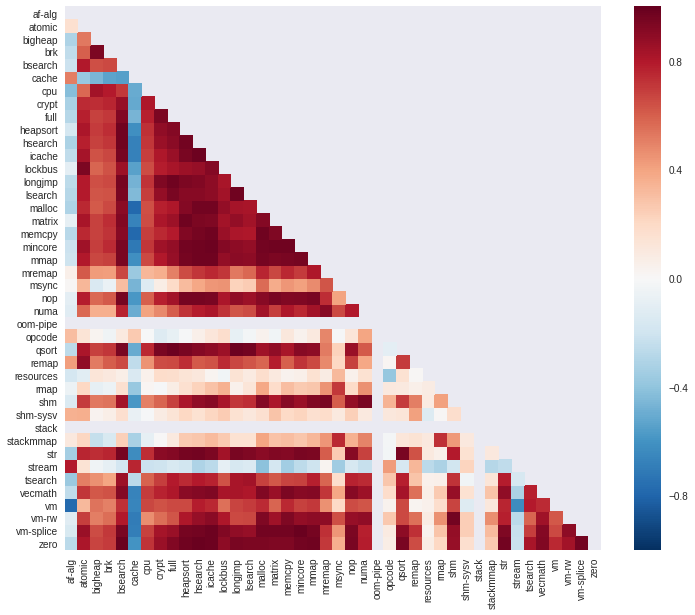

In [19]:
# plot correlation matrix for all stressors
corrmatrix = plot_corrmatrix(features[feature_columns])

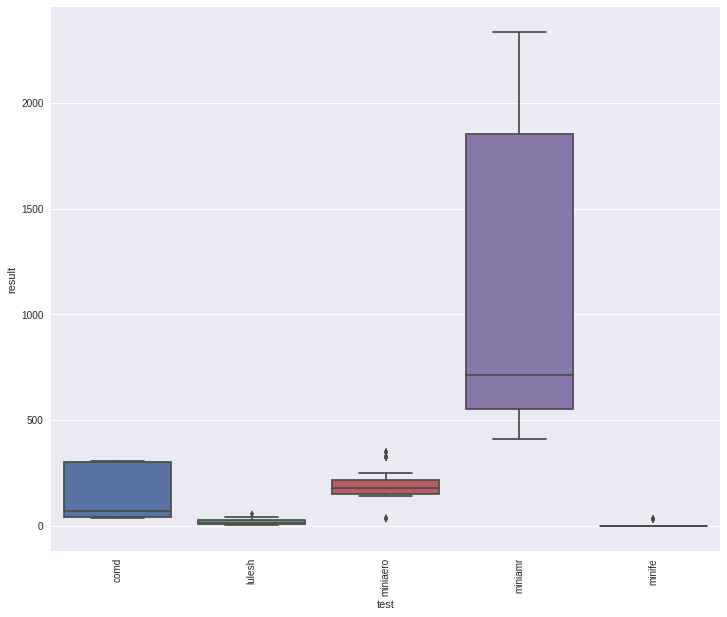

In [20]:
sns.boxplot(x='test', y='result', data=df.query('benchmark != "stressng"'))
_ = plt.xticks(rotation=90)

In [20]:
["{} = {}".format(i, np.mean(np.abs(corrmatrix[i])) < .5) for i in corrmatrix.columns]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in absolute
  """Entry point for launching an IPython kernel.


['af-alg = True',
 'atomic = False',
 'bigheap = False',
 'brk = False',
 'bsearch = False',
 'cache = False',
 'cpu = False',
 'crypt = False',
 'full = False',
 'heapsort = False',
 'hsearch = False',
 'icache = False',
 'lockbus = False',
 'longjmp = False',
 'lsearch = False',
 'malloc = False',
 'matrix = False',
 'memcpy = False',
 'mincore = False',
 'mmap = False',
 'mremap = True',
 'msync = False',
 'nop = False',
 'numa = False',
 'oom-pipe = False',
 'opcode = False',
 'qsort = False',
 'remap = False',
 'resources = True',
 'rmap = False',
 'shm = False',
 'shm-sysv = True',
 'stack = False',
 'stackmmap = False',
 'str = False',
 'stream = True',
 'tsearch = False',
 'vecmath = False',
 'vm = False',
 'vm-rw = False',
 'vm-splice = False',
 'zero = False']

In [21]:
#memory_stressors = ['bigheap','brk','full','lockbus','malloc','mmap','mremap','msync','numa','resources','rmap','remap','shm','shm-sysv','stackmmap','stream','vm', 'vm-rw', 'vm-splice', 'zero']

#memory_stressors = ['mremap', 'msync', 'rmap', 'shm-sysv', 'stackmmap', 'stream']
#cpu_stressors = list(pd.Index(feature_columns).difference(memory_stressors))
#vm_stressors = []

cpu_stressors = ['af-alg', 'atomic', 'bsearch', 'context', 'cpu', 'cpu-online', 'crypt', 'fp-error', 'getrandom', 'heapsort', 'hsearch', 'longjmp', 'lsearch', 'matrix', 'mergesort', 'nop', 'numa', 'opcode', 'qsort', 'rdrand', 'str', 'stream', 'tsc', 'tsearch', 'vecmath', 'wcs', 'zlib']
memory_stressors = ['atomic', 'bsearch', 'context', 'full', 'heapsort', 'hsearch', 'lockbus', 'lsearch', 'malloc', 'matrix', 'membarrier', 'memcpy', 'memfd', 'mergesort', 'mincore', 'null', 'numa', 'oom-pipe', 'pipe', 'qsort', 'remap', 'resources', 'rmap', 'stack', 'stackmmap', 'str', 'stream', 'tlb-shootdown', 'tmpfs', 'tsearch', 'vm', 'vm-rw', 'wcs', 'zero', 'zlib']
vm_stressors = ['bigheap', 'brk', 'madvise', 'malloc', 'mlock', 'mmap', 'mmapfork', 'mmapmany', 'mremap', 'msync', 'shm', 'shm-sysv', 'stack', 'stackmmap', 'tmpfs', 'userfaultfd', 'vm', 'vm-rw', 'vm-splice']

In [22]:
memory_stressors

['atomic',
 'bsearch',
 'context',
 'full',
 'heapsort',
 'hsearch',
 'lockbus',
 'lsearch',
 'malloc',
 'matrix',
 'membarrier',
 'memcpy',
 'memfd',
 'mergesort',
 'mincore',
 'null',
 'numa',
 'oom-pipe',
 'pipe',
 'qsort',
 'remap',
 'resources',
 'rmap',
 'stack',
 'stackmmap',
 'str',
 'stream',
 'tlb-shootdown',
 'tmpfs',
 'tsearch',
 'vm',
 'vm-rw',
 'wcs',
 'zero',
 'zlib']

In [23]:
cpu_stressors

['af-alg',
 'atomic',
 'bsearch',
 'context',
 'cpu',
 'cpu-online',
 'crypt',
 'fp-error',
 'getrandom',
 'heapsort',
 'hsearch',
 'longjmp',
 'lsearch',
 'matrix',
 'mergesort',
 'nop',
 'numa',
 'opcode',
 'qsort',
 'rdrand',
 'str',
 'stream',
 'tsc',
 'tsearch',
 'vecmath',
 'wcs',
 'zlib']

In [24]:
# gradient boosting regression
# taken from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# extended to normalize data

rs = np.random.RandomState(1)
z_scaler = StandardScaler()

def plot_importance(data, feats, apps):
    for b in apps:
        # normalize data
        z_data = z_scaler.fit_transform(data[feats])
        
        # fit using random forest regressor
        params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
                  'learning_rate': 0.01, 'loss': 'ls'}
        regr = GradientBoostingRegressor(**params)
        regr.fit(z_data, data[b])

        # Plot feature importance
        feature_importance = regr.feature_importances_
        # make importances relative to max importance
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(feats)[sorted_idx])
        plt.xlabel('Relative Importance')
        plt.title(b)
        plt.show()

        # print aggregate importance for each class
        importances = pd.DataFrame({'feature':feats,'importance':np.round(feature_importance,3)})
        print('CPU: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @cpu_stressors')['importance'].values[0]))
        print('MEM: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @memory_stressors')['importance'].values[0]))
        print('VM: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @vm_stressors')['importance'].values[0]))
        print('')

In [25]:
# taken from https://stackoverflow.com/a/5967539/389188
# {
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]
# }

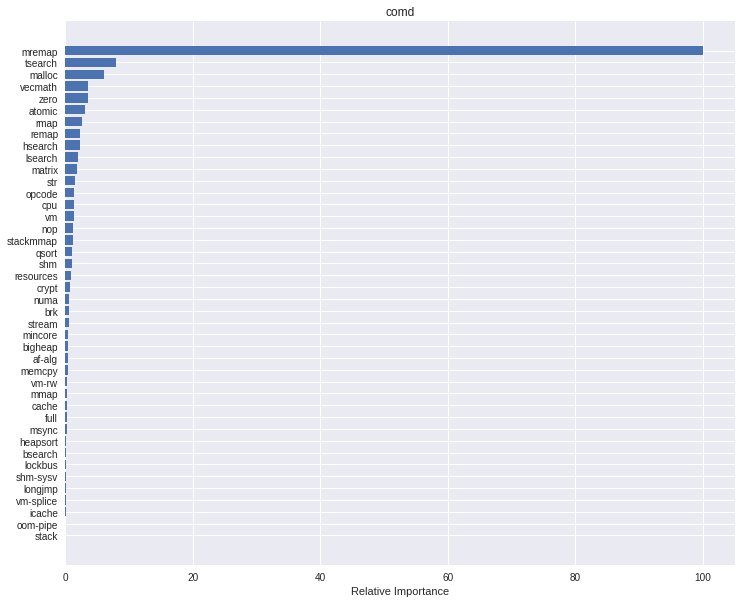

CPU: 7.979
MEM: 7.979
VM: 100.0



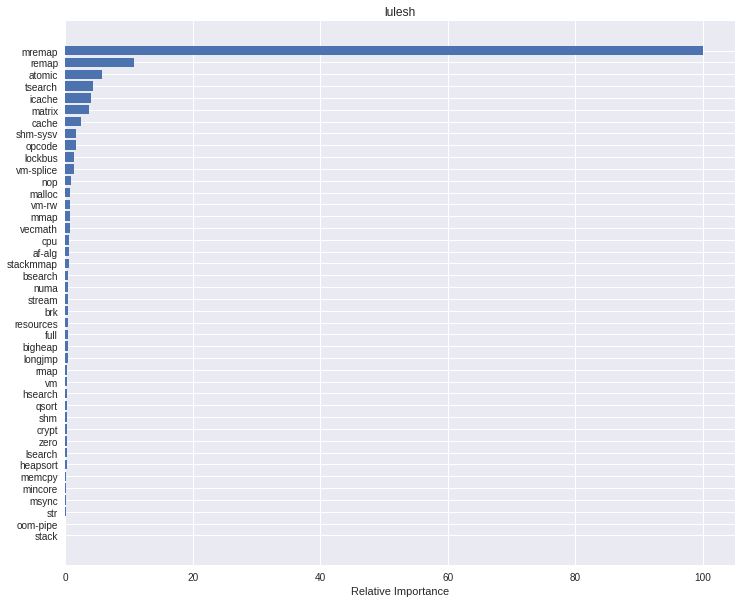

CPU: 5.738
MEM: 10.802
VM: 100.0



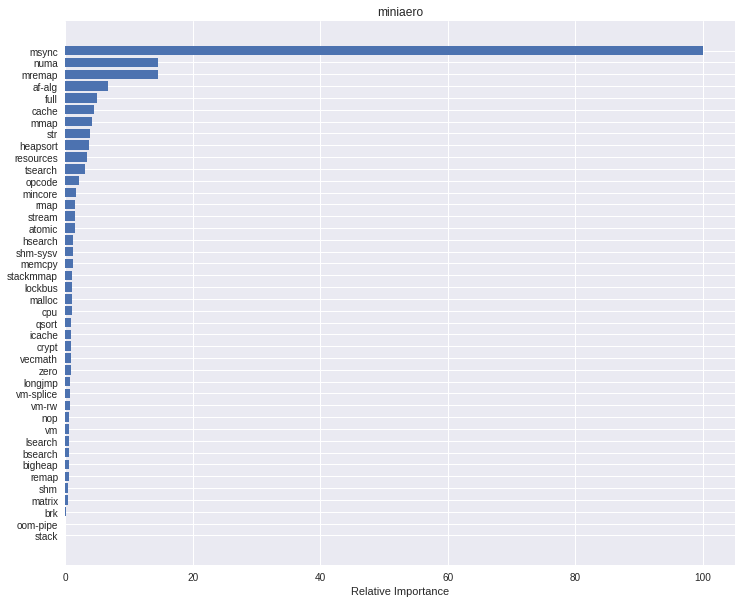

CPU: 14.631
MEM: 14.631
VM: 100.0



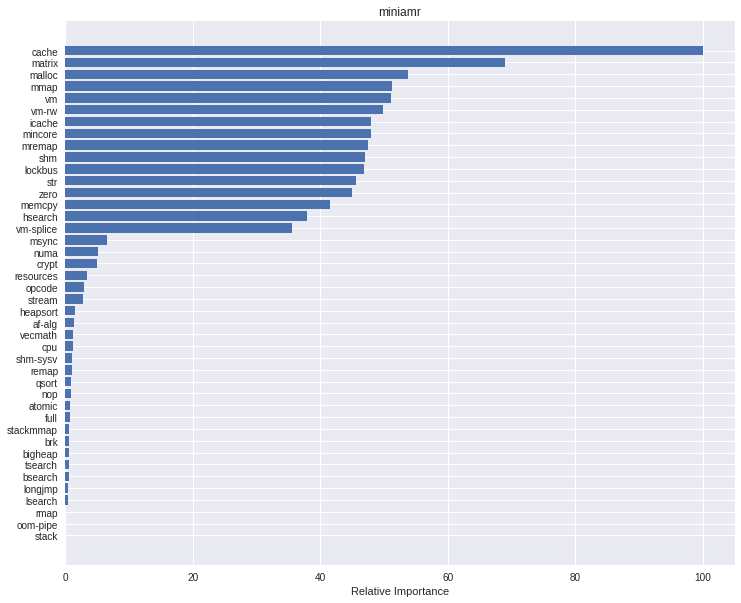

CPU: 69.025
MEM: 69.025
VM: 53.779



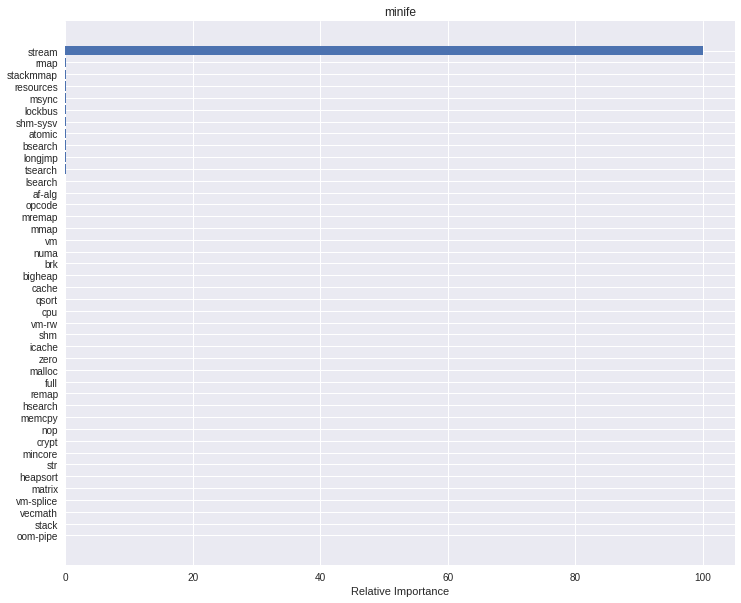

CPU: 100.0
MEM: 100.0
VM: 0.157



In [26]:
plot_importance(features, feature_columns, list(features.columns.difference(feature_columns + ['machine+repetition'])))

(0.0001, 100)

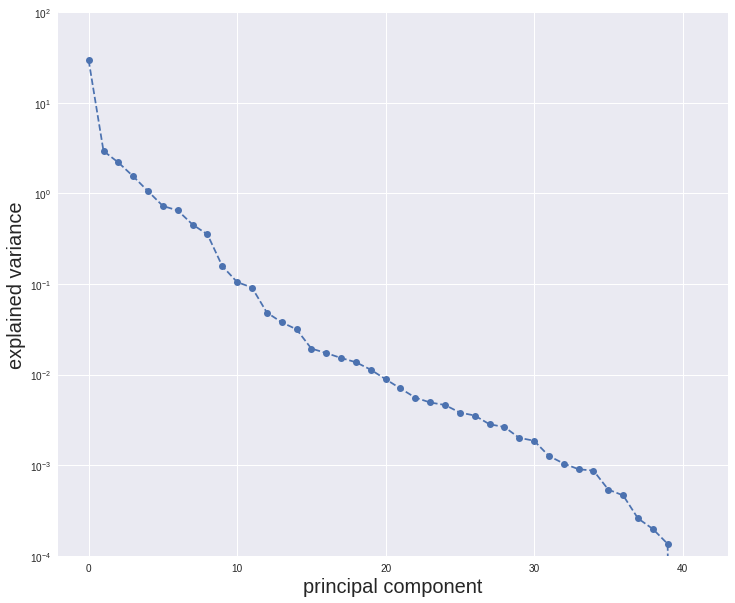

In [27]:
# taken from http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
#            https://github.com/jotterbach/Data-Exploration-and-Numerical-Experimentation/blob/master/Data-Analytics/PCA_Pitfalls.ipynb
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(features[feature_columns])
pca_stressors_norm = PCA().fit(z_data)
plt.semilogy(pca_stressors_norm.explained_variance_, '--o')
plt.xlabel('principal component', fontsize = 20);
plt.ylabel('explained variance', fontsize = 20);
plt.ylim([.0001,100])

In [305]:
df.machine.unique()

array(['c220g1.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho2.schedock-PG0.apt.emulab.net',
       'c6320.quiho2.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho2.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho2.Schedock.emulab.net',
       'd430.quiho2.Schedock.emulab.net',
       'd530.quiho2.Schedock.emulab.net',
       'd710.quiho2.Schedock.emulab.net',
       'd820.quiho2.Schedock.emulab.net',
       'dl360.quiho2.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-41',
       'm510.quiho2.schedock-PG0.utah.cloudlab.us',
       'pc3000.quiho2.Schedock.emulab.net',
       'pc3300.quiho2.emulab-net.uky.emulab.net',
       'pc3400.quiho2.emulab-net.uky.emulab.net',
       'pc3500.quiho2.emulab-net.uky.emulab.net',
       'r320.quiho2.schedock-PG0.apt.emulab.net',
       'r720.quiho2.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu'], dtype=object)

In [315]:
df.machine.unique()

array(['c220g1.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho2.schedock-PG0.apt.emulab.net',
       'c6320.quiho2.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho2.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho2.Schedock.emulab.net',
       'd430.quiho2.Schedock.emulab.net',
       'd530.quiho2.Schedock.emulab.net',
       'd710.quiho2.Schedock.emulab.net',
       'd820.quiho2.Schedock.emulab.net',
       'dl360.quiho2.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-41',
       'm510.quiho2.schedock-PG0.utah.cloudlab.us',
       'pc3000.quiho2.Schedock.emulab.net',
       'pc3300.quiho2.emulab-net.uky.emulab.net',
       'pc3400.quiho2.emulab-net.uky.emulab.net',
       'pc3500.quiho2.emulab-net.uky.emulab.net',
       'r320.quiho2.schedock-PG0.apt.emulab.net',
       'r720.quiho2.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu'], dtype=object)

(0.0001, 100)

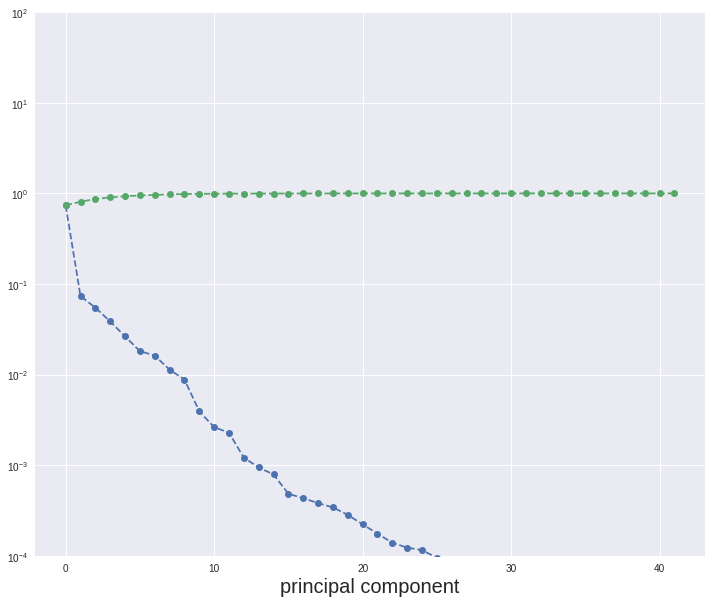

In [30]:
plt.semilogy(pca_stressors_norm.explained_variance_ratio_, '--o');
plt.semilogy(pca_stressors_norm.explained_variance_ratio_.cumsum(), '--o');
plt.xlabel('principal component', fontsize = 20);
plt.ylim([.0001,100])

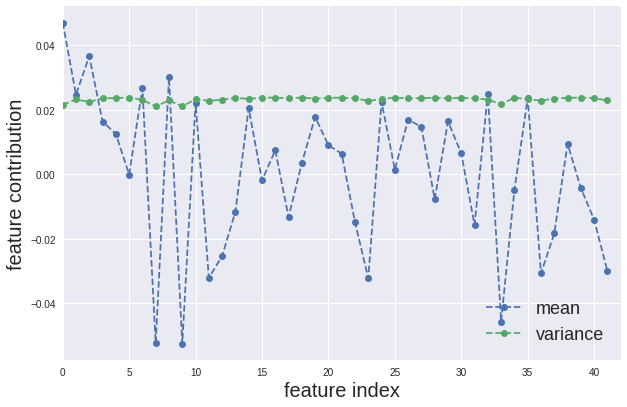

In [31]:
n_comp = len(feature_columns)
pca_inv_data = pca_stressors_norm.inverse_transform(np.eye(n_comp))
fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major');
plt.tick_params(axis='both', which='minor');
plt.xlim([0, len(feature_columns)])
plt.legend(loc='lower right', fontsize=18)

In [32]:
# show indices where mean of variance is greater than a threshold
mean_threshold=0.035
np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)

(array([ 0,  2,  7,  9, 33]),)

In [33]:
# show which stressors they correspond to
most_relevant = list(np.array(feature_columns)[np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)])
most_relevant

['af-alg', 'bigheap', 'crypt', 'heapsort', 'stackmmap']